In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
from scipy.stats import mstats

from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/xiaowanzisj/Predictive-Modelling-Fall-2024/refs/heads/main/Customer_Data.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12



---
# Part 1: Understanding the Credit Card Business

The credit card business is primarily operated by banks, credit unions, and networks. These institutions generate profits through interest, fees from customers, and interchange fees from merchants. Credit card issuers typically assess customer value based on a combination of features that predict a customer’s potential to generate revenue while minimizing risk.

Customers who display higher spending habits, make full payments, maintain steady repayment behavior, or hold healthy balances are usually considered valuable by card issuers due to their profitability and low risk. On the other hand, customers who make limited purchases, low payments, or frequently cash out in advance may be viewed as lower-value customers.

---


In [3]:
 df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


---

# Part 2: Data Preprocessing

- **Missing Values**: We found one missing value in the `CREDIT_LIMIT` column, which was deleted, as removing one data point will not significantly impact the dataset. Additionally, the `MINIMUM_PAYMENTS` column had 313 missing values. Since this is a considerable amount and the feature captures an important characteristic of customer payments, we couldn't simply delete these records. To address this, we replaced missing values based on the relationship between `MINIMUM_PAYMENTS` and `PAYMENTS`. Specifically:
  - If `PAYMENTS = 0`, we assumed `MINIMUM_PAYMENTS = 0`.
  - If `PAYMENTS` is between 0 and its mean, we replaced the missing `MINIMUM_PAYMENTS` with the respective `PAYMENTS` values.
  - If `PAYMENTS` exceeds its mean, we replaced the missing `MINIMUM_PAYMENTS` with the mean of `PAYMENTS`.

- **Incorrect Data**: Upon checking the range of frequency columns, we discovered one data point in `CASH_ADVANCE_FREQUENCY` that was out of the expected range of 0 to 1. We replaced this value with 1.0.

- **Duplicate Rows**: We checked for duplicate rows in the dataset and found none, indicating no duplicate entries.

---


In [6]:
# Find the rows where CREDIT_LIMIT is missing (NaN)
missing_credit_limit_data = df[df['CREDIT_LIMIT'].isnull()]

# Display the result
missing_credit_limit_data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5203,C15349,18.400472,0.166667,0.0,0.0,0.0,186.853063,0.0,0.0,0.0,0.166667,1,0,NaN,9.040017,14.418723,0.0,6


In [7]:
df.drop([5203], axis=0, inplace=True)
df.reset_index( inplace = True)
df.drop('index',axis=1,inplace = True)
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8944,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8945,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8946,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8947,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [8]:
# Select the frequency columns
frequency_columns = [
    'BALANCE_FREQUENCY', 
    'PURCHASES_FREQUENCY', 
    'ONEOFF_PURCHASES_FREQUENCY',
    'PURCHASES_INSTALLMENTS_FREQUENCY', 
    'CASH_ADVANCE_FREQUENCY'
]

# Get the range (min and max) for each frequency column
frequency_ranges = df[frequency_columns].agg(['min', 'max'])
frequency_ranges

,BALANCE_FREQUENCY,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY
min,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.5


In [9]:
# Make sure you use df_cluster (or make sure you use the same name)
df['CASH_ADVANCE_FREQUENCY'] = df['CASH_ADVANCE_FREQUENCY'].apply(lambda x: 1 if x > 1 else x)

# Print the modified columns to check whether they have been successfully modified
print(df['CASH_ADVANCE_FREQUENCY'].max())  



1.0


In [10]:
# Check with dupicated rows
duplicate_rows = df[df.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

Number of duplicate rows: 0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8949 entries, 0 to 8948
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8949 non-null   object 
 1   BALANCE                           8949 non-null   float64
 2   BALANCE_FREQUENCY                 8949 non-null   float64
 3   PURCHASES                         8949 non-null   float64
 4   ONEOFF_PURCHASES                  8949 non-null   float64
 5   INSTALLMENTS_PURCHASES            8949 non-null   float64
 6   CASH_ADVANCE                      8949 non-null   float64
 7   PURCHASES_FREQUENCY               8949 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8949 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8949 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8949 non-null   float64
 11  CASH_ADVANCE_TRX                  8949 non-null   int64  
 12  PURCHA

In [12]:
# Check the initial missing values in Minimum_Payments
print(f"Missing values in 'Minimum_Payments' before: {df['MINIMUM_PAYMENTS'].isnull().sum()}")

# For rows where PAYMENTS is 0, set the missing Minimum_Payments to 0
df.loc[df["PAYMENTS"] == 0, "MINIMUM_PAYMENTS"] = df['MINIMUM_PAYMENTS'].fillna(0)

# Check the missing values again in Minimum_Payments
print(f"Missing values in 'Minimum_Payments' after: {df['MINIMUM_PAYMENTS'].isnull().sum()}")

Missing values in 'Minimum_Payments' before: 313
Missing values in 'Minimum_Payments' after: 73


In [13]:
minpay = df['MINIMUM_PAYMENTS'].copy()

# Compute the mean of PAYMENTS
payments_mean = np.mean(df['PAYMENTS'])
#If PAYMENTS is between 0 and the mean, and MINIMUM_PAYMENTS is missing, set MINIMUM_PAYMENTS to the value of PAYMENTS
minpay.loc[(df['PAYMENTS'] > 0) & (df['PAYMENTS'] < payments_mean) & (df['MINIMUM_PAYMENTS'].isna())] = df['PAYMENTS']

#If PAYMENTS is above the mean, and MINIMUM_PAYMENTS is missing, set MINIMUM_PAYMENTS to the mean of PAYMENTS
minpay.loc[(df['PAYMENTS'] >= payments_mean) & (df['MINIMUM_PAYMENTS'].isna())] = payments_mean

In [14]:
print(f'Missing values in "MINIMUM_PAYMENTS" before: {df["MINIMUM_PAYMENTS"].isna().sum()}')
print(f'Missing values in "MINIMUM_PAYMENTS" after: {minpay.isna().sum()}')

# Update the original MINIMUM_PAYMENTS column with the modified version
df['MINIMUM_PAYMENTS'] = minpay.copy()

# Verify changes in the original DataFrame
print(f'Final missing values in "MINIMUM_PAYMENTS": {df["MINIMUM_PAYMENTS"].isna().sum()}')

Missing values in "MINIMUM_PAYMENTS" before: 73
Missing values in "MINIMUM_PAYMENTS" after: 0
Final missing values in "MINIMUM_PAYMENTS": 0


In [15]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [16]:
# Delete the CUST_ID column, which is only used for data analysis and not as a clustering feature
df_cluster = df.drop(columns=['CUST_ID','TENURE']).copy()


---

# Part 3: EDA Summary

- **Data Distribution by Feature**: The boxplots and distributions show that most features are right-skewed, with the majority of data concentrated at the lower end of the range and fewer data points in the higher end. However, features like `BALANCE_FREQUENCY` and `TENURE` exhibit different patterns. 
  - `BALANCE_FREQUENCY` has most of its data between 0.9 and 1.0, indicating that most accounts are frequently updated, which reflects active account usage.
  - `TENURE` shows the majority of data around 12 years, suggesting that most customers have long-term relationships with their credit cards. In some cases, `TENURE` may reflect customer creditworthiness, as banks assign different tenures based on their assessment of customers' financial situations and ability to pay bills.

- **Outliers**: In our analysis of feature distributions and specific checks for outliers in key features, we identified numerous outliers and noisy data points. Features like `PURCHASES` and `CREDIT_LIMIT` have extreme high values, which can be valuable from a business perspective since they represent high-spending customers or those with higher credit limits. Rather than removing these outliers, we used the Quantile method, capping data at the 1st and 99th percentiles, thereby retaining valuable outliers while limiting extreme values.

- **Feature Correlation**: We used a heatmap to examine feature correlations, revealing a few pairs of features with high positive correlations (above 0.88). Since the negative correlations were not significant, we chose to ignore them. We focused on the top five pairs with high positive correlations.

- **Standardization**: We applied a Standard Scaler to standardize the data. Given the varying scales of features like balance, tenure, and frequencies (e.g., `PURCHASES` may be in the thousands while `PURCHASES_FREQUENCY` is on a 0–1 scale), standardization was necessary. Without it, features with larger numerical ranges could dominate the clustering process, especially in models like K-Means, which rely on Euclidean distances.

- **Feature Reduction**: Based on the correlation analysis, we found that some features, such as `ONEOFF_PURCHASES` and `PURCHASES`, as well as `PURCHASES` and `PURCHASES_TRX`, were highly correlated. Since these pairs can explain each other to some extent (e.g., `PURCHASES_TRX` represents the number of purchase transactions, a metric closely tied to `PURCHASES`), we decided to drop `PURCHASES_TRX` and `ONEOFF_PURCHASES` to prevent certain features from disproportionately influencing the clustering process.

---



In [17]:
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8949 entries, 0 to 8948
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8949 non-null   float64
 1   BALANCE_FREQUENCY                 8949 non-null   float64
 2   PURCHASES                         8949 non-null   float64
 3   ONEOFF_PURCHASES                  8949 non-null   float64
 4   INSTALLMENTS_PURCHASES            8949 non-null   float64
 5   CASH_ADVANCE                      8949 non-null   float64
 6   PURCHASES_FREQUENCY               8949 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8949 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8949 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8949 non-null   float64
 10  CASH_ADVANCE_TRX                  8949 non-null   int64  
 11  PURCHASES_TRX                     8949 non-null   int64  
 12  CREDIT

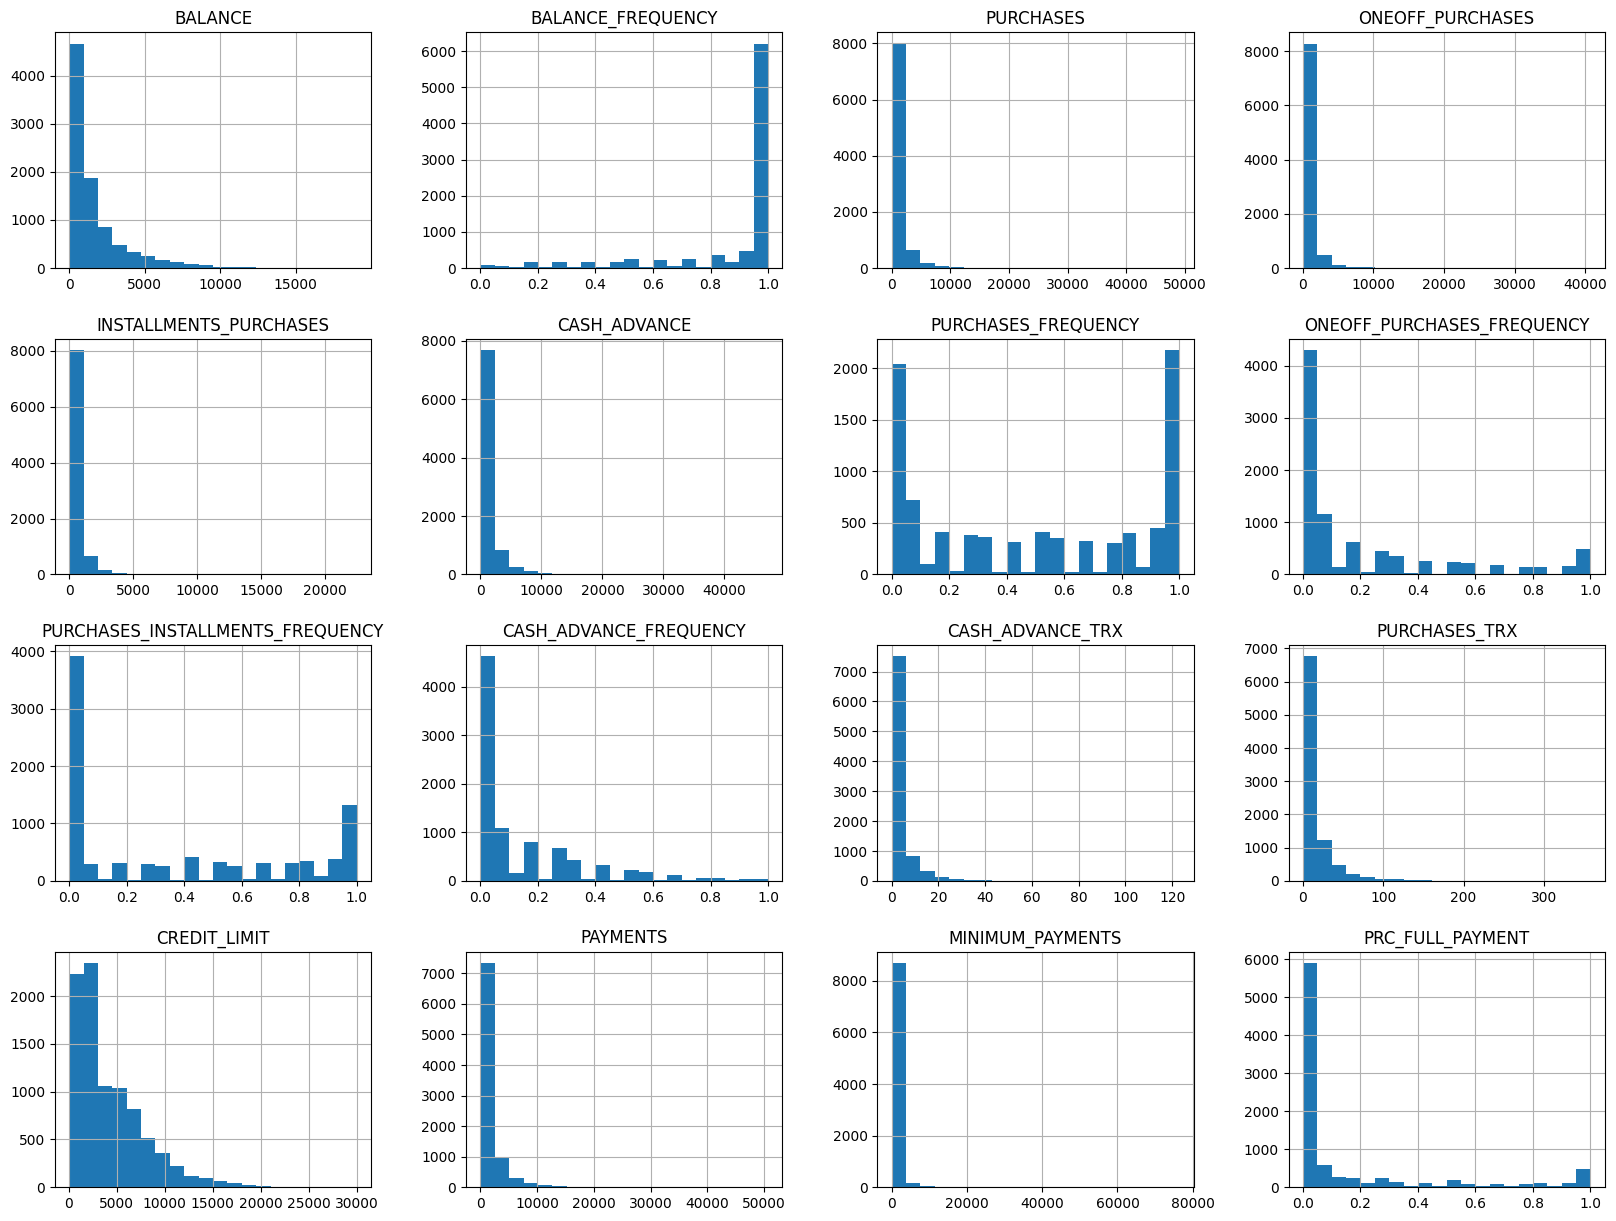

In [18]:
# Draw a histogram
df_cluster.hist(bins=20, figsize=(20, 15))
plt.show()


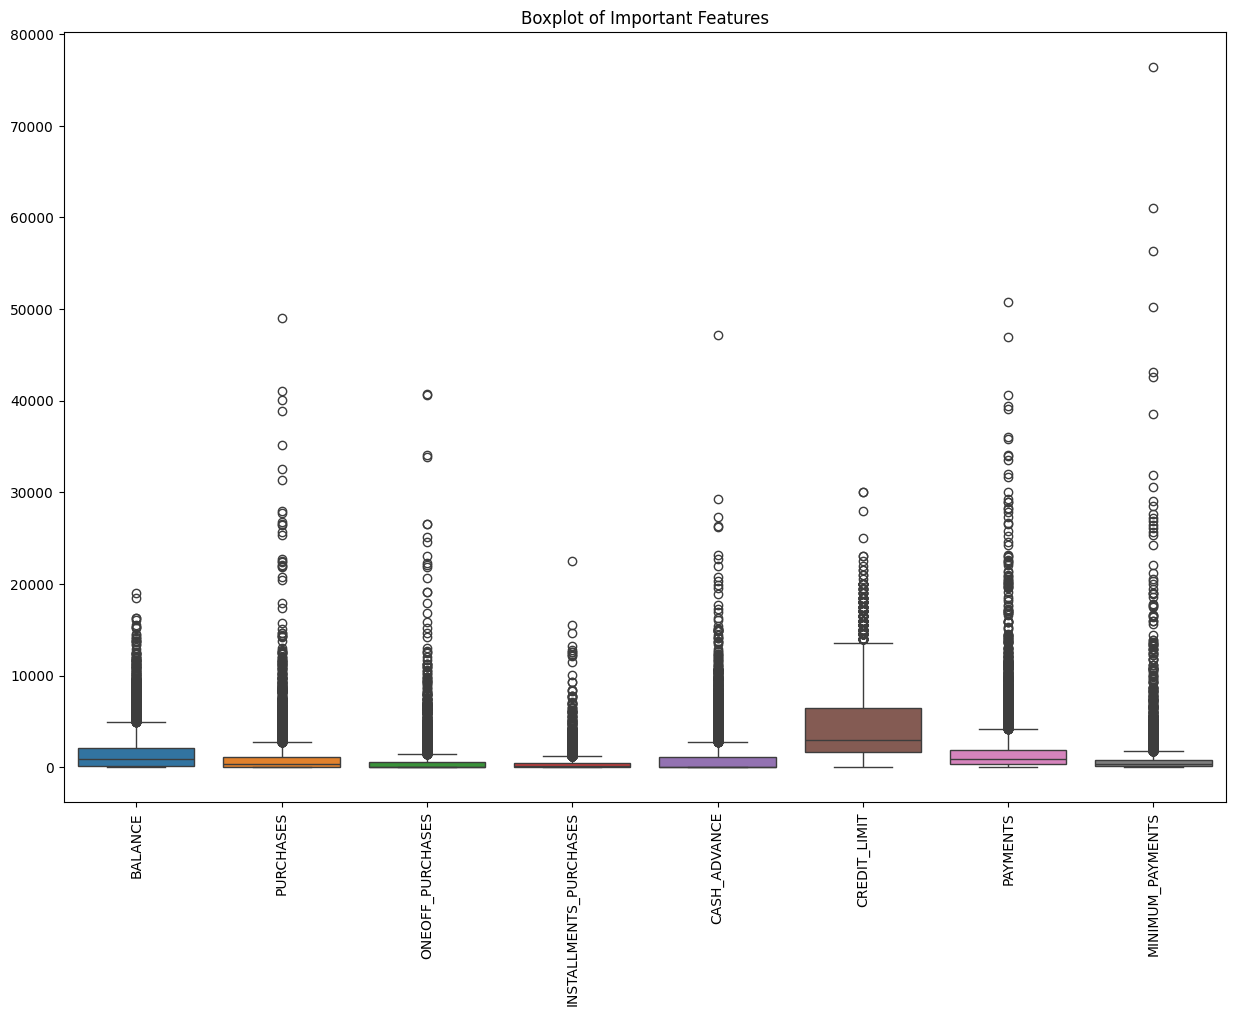

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a list of important features
important_features = [
    'BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 
    'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS'
]

plt.figure(figsize=(15, 10))

sns.boxplot(data=df_cluster[important_features])

plt.title('Boxplot of Important Features')
plt.xticks(rotation=90)  
plt.show()

In [20]:
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8949 entries, 0 to 8948
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8949 non-null   float64
 1   BALANCE_FREQUENCY                 8949 non-null   float64
 2   PURCHASES                         8949 non-null   float64
 3   ONEOFF_PURCHASES                  8949 non-null   float64
 4   INSTALLMENTS_PURCHASES            8949 non-null   float64
 5   CASH_ADVANCE                      8949 non-null   float64
 6   PURCHASES_FREQUENCY               8949 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8949 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8949 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8949 non-null   float64
 10  CASH_ADVANCE_TRX                  8949 non-null   int64  
 11  PURCHASES_TRX                     8949 non-null   int64  
 12  CREDIT

In [21]:
from sklearn.feature_selection import VarianceThreshold

# Initialize the variance threshold object and set the variance threshold to 0.1 (adjustable)
selector = VarianceThreshold(threshold=0.1)
selector.fit(df_cluster)

# Get features with large variance
important_features = df_cluster.columns[selector.get_support()].tolist()
print(important_features)

['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS']


In [22]:
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8949 entries, 0 to 8948
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8949 non-null   float64
 1   BALANCE_FREQUENCY                 8949 non-null   float64
 2   PURCHASES                         8949 non-null   float64
 3   ONEOFF_PURCHASES                  8949 non-null   float64
 4   INSTALLMENTS_PURCHASES            8949 non-null   float64
 5   CASH_ADVANCE                      8949 non-null   float64
 6   PURCHASES_FREQUENCY               8949 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8949 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8949 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8949 non-null   float64
 10  CASH_ADVANCE_TRX                  8949 non-null   int64  
 11  PURCHASES_TRX                     8949 non-null   int64  
 12  CREDIT

In [23]:
# Use percentiles for truncation of important features
for feature in important_features:
    # Define upper and lower bounds as 1% and 99% quantiles
    lower_bound = df_cluster[feature].quantile(0.01)
    upper_bound = df_cluster[feature].quantile(0.99)
    
    df_cluster[feature] = df_cluster[feature].clip(lower=lower_bound, upper=upper_bound)

# Output the processed results
print(df_cluster[important_features].describe())



           BALANCE    PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
count  8949.000000  8949.000000       8949.000000             8949.000000   
mean   1541.217542   936.340091        536.556019              384.541490   
std    1966.644220  1525.271162       1096.973016              676.297447   
min       0.065095     0.000000          0.000000                0.000000   
25%     128.365782    39.800000          0.000000                0.000000   
50%     873.680279   361.490000         38.000000               89.000000   
75%    2054.372848  1110.170000        577.830000              468.650000   
max    9338.873258  8977.910000       6690.126400             3886.256000   

       CASH_ADVANCE  PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count   8949.000000          8949.000000                       8949.000000   
mean     936.006350             0.490405                          0.364478   
std     1775.863868             0.401360                          0.3974

In [24]:
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8949 entries, 0 to 8948
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8949 non-null   float64
 1   BALANCE_FREQUENCY                 8949 non-null   float64
 2   PURCHASES                         8949 non-null   float64
 3   ONEOFF_PURCHASES                  8949 non-null   float64
 4   INSTALLMENTS_PURCHASES            8949 non-null   float64
 5   CASH_ADVANCE                      8949 non-null   float64
 6   PURCHASES_FREQUENCY               8949 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8949 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8949 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8949 non-null   float64
 10  CASH_ADVANCE_TRX                  8949 non-null   int64  
 11  PURCHASES_TRX                     8949 non-null   float64
 12  CREDIT

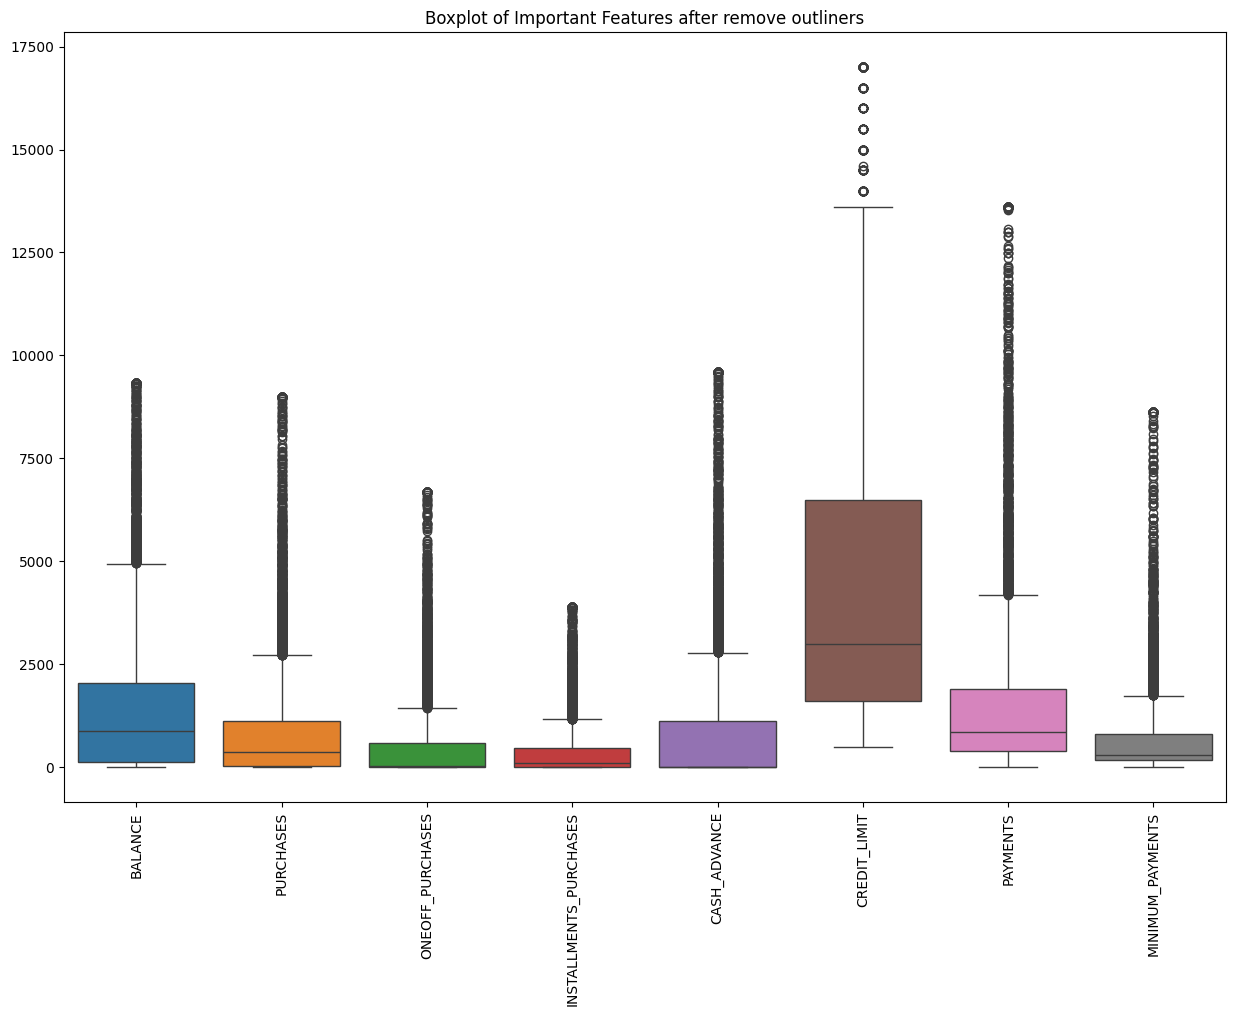

In [25]:
# After outliners
important_features = [
    'BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 
    'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS'
]

plt.figure(figsize=(15, 10))

sns.boxplot(data=df_cluster[important_features])

plt.title('Boxplot of Important Features after remove outliners')
plt.xticks(rotation=90)  
plt.show()


### Correlation analysis

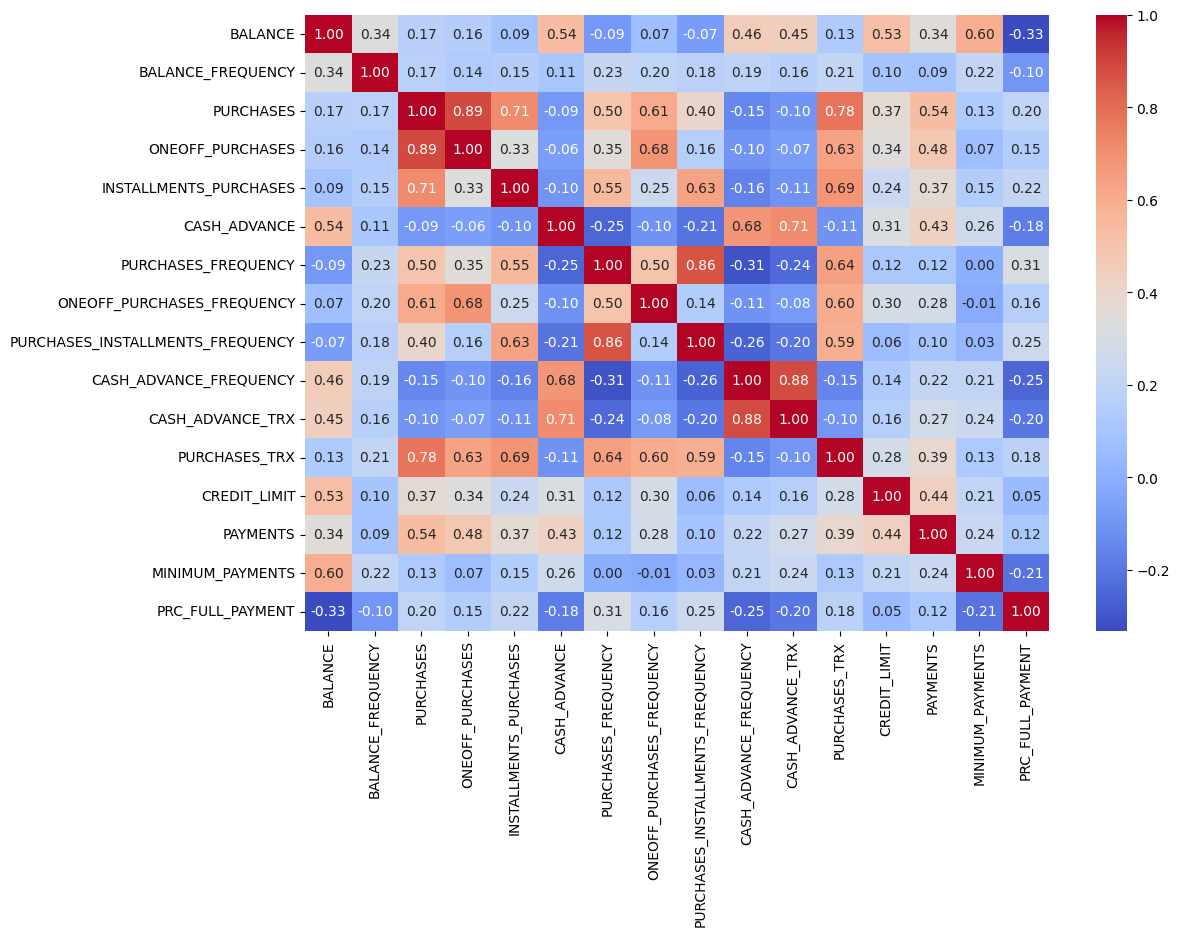

In [26]:
# Correlation matrix
corr_matrix = df_cluster.corr()

# heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()


In [27]:
# Get top 10 highest and lowest
corr_pairs = corr_matrix.unstack()
corr_pairs = corr_pairs[corr_pairs != 1]
sorted_corr_pairs = corr_pairs.sort_values(ascending=False)

top5_highest_corr = sorted_corr_pairs.head(10)
top5_lowest_corr = sorted_corr_pairs.tail(10)

# Print result
print("Top 10 highest correlations:")
print(top5_highest_corr)

print("\nTop 10 lowest correlations:")
print(top5_lowest_corr)


Top 10 highest correlations:
ONEOFF_PURCHASES                  PURCHASES                           0.885790
PURCHASES                         ONEOFF_PURCHASES                    0.885790
CASH_ADVANCE_TRX                  CASH_ADVANCE_FREQUENCY              0.882135
CASH_ADVANCE_FREQUENCY            CASH_ADVANCE_TRX                    0.882135
PURCHASES_INSTALLMENTS_FREQUENCY  PURCHASES_FREQUENCY                 0.862921
PURCHASES_FREQUENCY               PURCHASES_INSTALLMENTS_FREQUENCY    0.862921
PURCHASES_TRX                     PURCHASES                           0.780805
PURCHASES                         PURCHASES_TRX                       0.780805
CASH_ADVANCE                      CASH_ADVANCE_TRX                    0.710303
CASH_ADVANCE_TRX                  CASH_ADVANCE                        0.710303
dtype: float64

Top 10 lowest correlations:
CASH_ADVANCE                      PURCHASES_FREQUENCY                -0.249915
PURCHASES_FREQUENCY               CASH_ADVANCE            

In [28]:
# Feature Scaling (very important)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster)

In [29]:
# The correlation between PURCHASES and ONEOFF_PURCHASES is 0.92
# Since their linear relationship is very strong, it may bring redundant information. 
# It is recommended to delete one of the features. In general, keep the more representative features and delete the more correlated features.
df_cluster = df_cluster.drop(columns=['PURCHASES_TRX','ONEOFF_PURCHASES']).copy()


---

# Part 4: Clustering Algorithms

## Model Interpretation:

We applied several clustering models to understand the structure within our dataset and evaluated each model based on its performance. The key metric used for comparison was the **Silhouette Score**, along with visual interpretations from PCA plots.

- **K-means Clustering**: The PCA plot for the K-means model displayed clear separation among the three clusters (blue, green, and red). The clusters had minimal overlap, with the blue cluster being particularly compact. This indicates that the K-means model captured distinct customer segments, reflecting different behaviors and characteristics among them. The **Silhouette Score** for K=3 was **0.3902**, the highest among all models, suggesting strong internal consistency within clusters and distinct separation between them.
  
- **Hierarchical Clustering**: While the hierarchical model created three clusters (purple, teal, and yellow), the overlap between the teal and yellow clusters was noticeable. This overlap suggested that the separation between these clusters was less clear. The **Silhouette Score** for 3 clusters was **0.3770**, slightly lower than that of K-means, indicating moderate separation but room for improvement in distinguishing the clusters.

- **DBSCAN**: The DBSCAN model was less successful in identifying distinct clusters. Most data points were grouped into a single cluster (6601 points), with a significant number labeled as noise (2278 points). The lack of distinct clusters made it difficult to calculate a meaningful Silhouette Score, and the PCA plot revealed that most data points were concentrated in one dense cluster with only a few scattered points. This suggests that the current parameters (eps=1.3, min_samples=8) may not be optimal and would need further tuning.

- **Gaussian Mixture Model (GMM)**: The GMM model also revealed three clusters but showed noticeable overlap, particularly in Cluster 2 (yellow). This overlap indicates some ambiguity in the cluster boundaries, likely due to the complex nature of the dataset. The **Silhouette Score** was **0.3769**, similar to that of the hierarchical model, reflecting moderate separation.

## Model Selection:

Based on the evaluation metrics and visual separation observed in the PCA plots, **K-means** is the best model for this dataset. It demonstrated the clearest separation between clusters, with distinct and compact groupings that had minimal overlap. This was supported by the highest Silhouette Score of **0.3902**, indicating that K-means effectively captures the different customer groups.

While hierarchical clustering showed some promise, the overlap between clusters suggested that it was less effective in creating distinct segments. DBSCAN struggled to form meaningful clusters under the current parameter settings, and the GMM model, though identifying distinct groups, still had overlapping clusters, which reduced its effectiveness in distinguishing customer groups.

Therefore, **K-means** is the most suitable model for segmenting the customers in this analysis.

---


## Kmeans

In [30]:
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8949 entries, 0 to 8948
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8949 non-null   float64
 1   BALANCE_FREQUENCY                 8949 non-null   float64
 2   PURCHASES                         8949 non-null   float64
 3   INSTALLMENTS_PURCHASES            8949 non-null   float64
 4   CASH_ADVANCE                      8949 non-null   float64
 5   PURCHASES_FREQUENCY               8949 non-null   float64
 6   ONEOFF_PURCHASES_FREQUENCY        8949 non-null   float64
 7   PURCHASES_INSTALLMENTS_FREQUENCY  8949 non-null   float64
 8   CASH_ADVANCE_FREQUENCY            8949 non-null   float64
 9   CASH_ADVANCE_TRX                  8949 non-null   int64  
 10  CREDIT_LIMIT                      8949 non-null   float64
 11  PAYMENTS                          8949 non-null   float64
 12  MINIMU

Text(0.5, 1.0, 'Elbow Method for Optimal k')

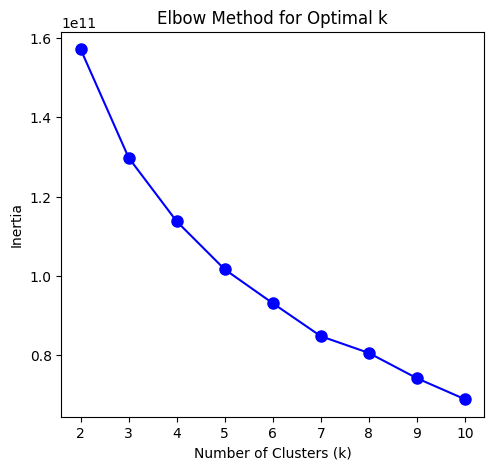

In [31]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Use Elbow Method to determine the K value
inertia = []
silhouette_scores = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_cluster)
    inertia.append(kmeans.inertia_)
    score = silhouette_score(df_cluster, kmeans.labels_)
    silhouette_scores.append(score)

# Plot Elbow Method and Silhouette Score
plt.figure(figsize=(12, 5))

# Elbow method plot
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, 'bo-', markersize=8)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')

In [32]:
# We will use k=3 and k=2, respectively, and try running K-Means
## k=3
kmeans_3 = KMeans(n_clusters=3, random_state=42)
df['KMeans_Cluster'] = kmeans_3.fit_predict(df_cluster)

# Recalculate silhouette scores for k=3
from sklearn.metrics import silhouette_score
silhouette_avg_3 = silhouette_score(df_cluster, df['KMeans_Cluster'])
print("Silhouette Score with k=3:", silhouette_avg_3)

Silhouette Score with k=3: 0.3901566835968815


In [33]:
# K-Means Model with Optimal k=3
optimal_k = 3  
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_cluster['KMeans_Cluster'] = kmeans.fit_predict(df_cluster) 

print(df_cluster['KMeans_Cluster'].value_counts())

KMeans_Cluster
0    5546
1    2528
2     875
Name: count, dtype: int64


In [34]:
# Select numeric columns and exclude non-numeric columns (if any)
numeric_columns = df_cluster.select_dtypes(include=['float64', 'int64']).columns

# Group by cluster and calculate the feature mean for each cluster
cluster_means = df_cluster.groupby('KMeans_Cluster')[numeric_columns].mean()

# Calculate the variance of each feature between the means of different clusters
feature_variance = cluster_means.var()

# Sort by variance and get the top 5 features
top_5_features = feature_variance.sort_values(ascending=False).head(5)

print("Top 5 Important Features based on Variance Across Clusters:")
print(top_5_features)



Top 5 Important Features based on Variance Across Clusters:
CREDIT_LIMIT    1.991096e+07
PAYMENTS        6.600578e+06
BALANCE         5.167249e+06
CASH_ADVANCE    2.799011e+06
PURCHASES       1.045654e+06
dtype: float64


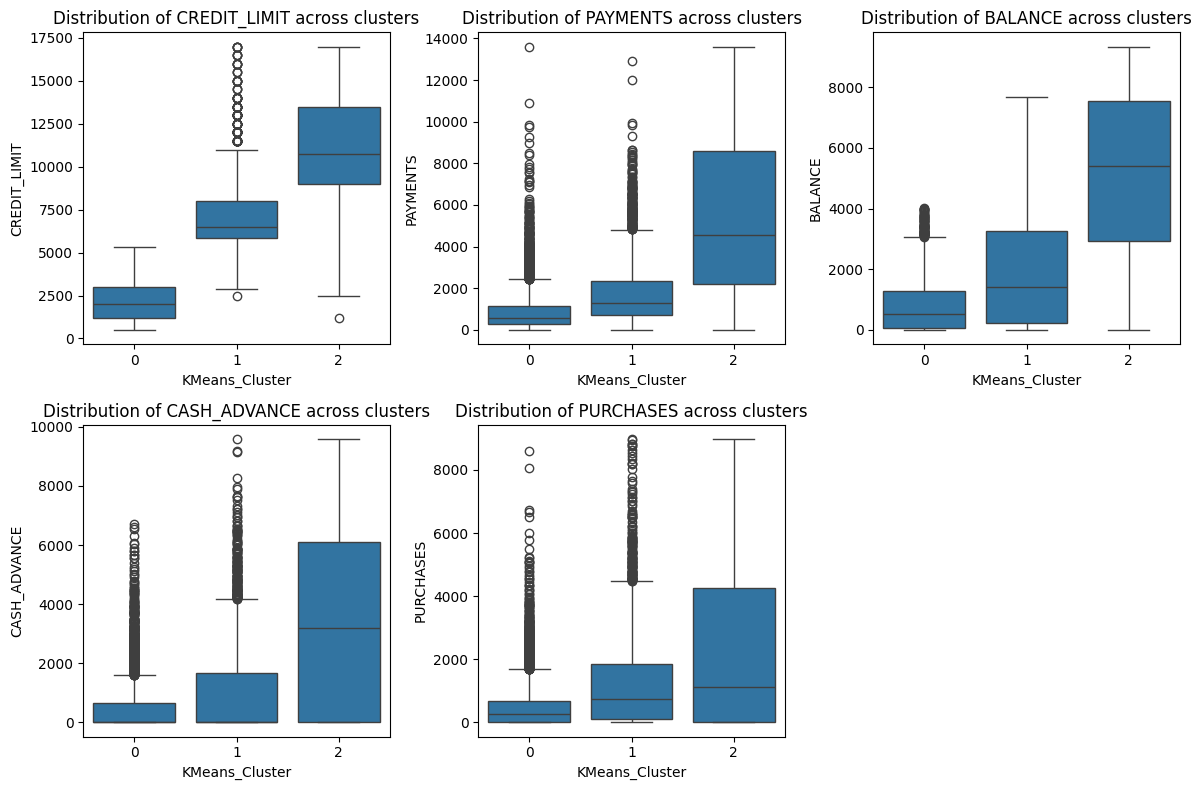

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the names of the top 5 features
top_features = top_5_features.index

plt.figure(figsize=(12, 8))

# Visualize the distribution of these features in each cluster
for i, feature in enumerate(top_features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x='KMeans_Cluster', y=feature, data=df_cluster)
    plt.title(f'Distribution of {feature} across clusters')

plt.tight_layout()
plt.show()


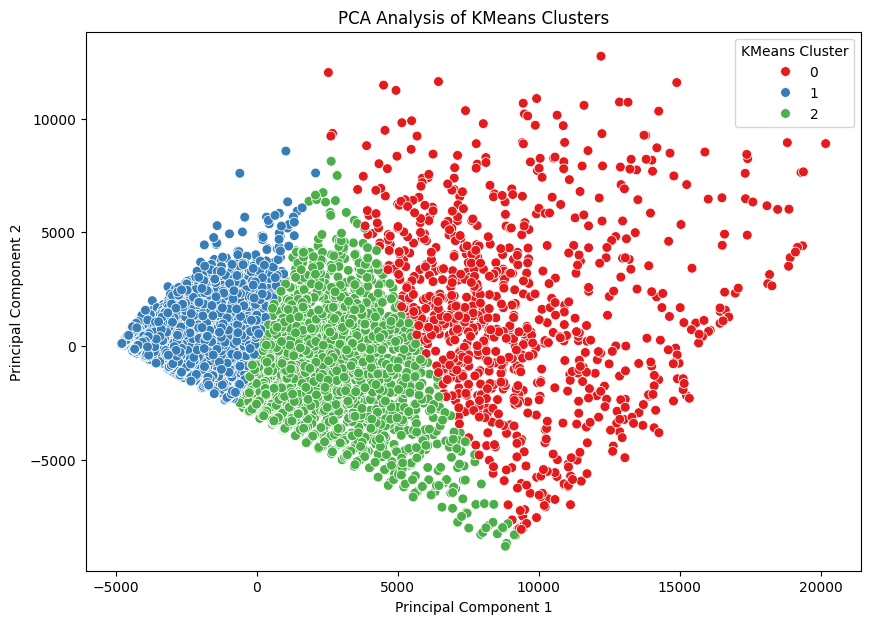

In [36]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Fit PCA on the data
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
pca_data = pca.fit_transform(df_cluster)  # Assuming df_cluster is the preprocessed dataset

# Step 2: Perform KMeans clustering on the original data
optimal_k = 3  # As determined previously
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_cluster['KMeans_Cluster'] = kmeans.fit_predict(df_cluster)

# Step 3: Create a DataFrame with PCA results and cluster labels
pca_df = pd.DataFrame(pca_data, columns=['PCA1', 'PCA2'])
pca_df['KMeans_Cluster'] = df_cluster['KMeans_Cluster']

# Step 4: Visualize the PCA components with KMeans clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PCA1', y='PCA2', hue='KMeans_Cluster', palette='Set1', data=pca_df, s=50)
plt.title("PCA Analysis of KMeans Clusters")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="KMeans Cluster")
plt.show()


This cluster separation is quite good based on the PCA plot.This separation suggests that the model effectively distinguishes between different customer groups within each cluster.

Clear separation: There is a noticeable gap between the blue, green, and red clusters, indicating significant differences between clusters with minimal overlap among data points.

Compactness and distribution: Data points within each cluster are relatively close together (especially in the blue cluster), suggesting high similarity within each cluster.

Directional distribution: The three clusters are distributed along different directions of the PCA components, indicating distinct characteristic patterns or behaviors among them.



## Hierarchical Clustering

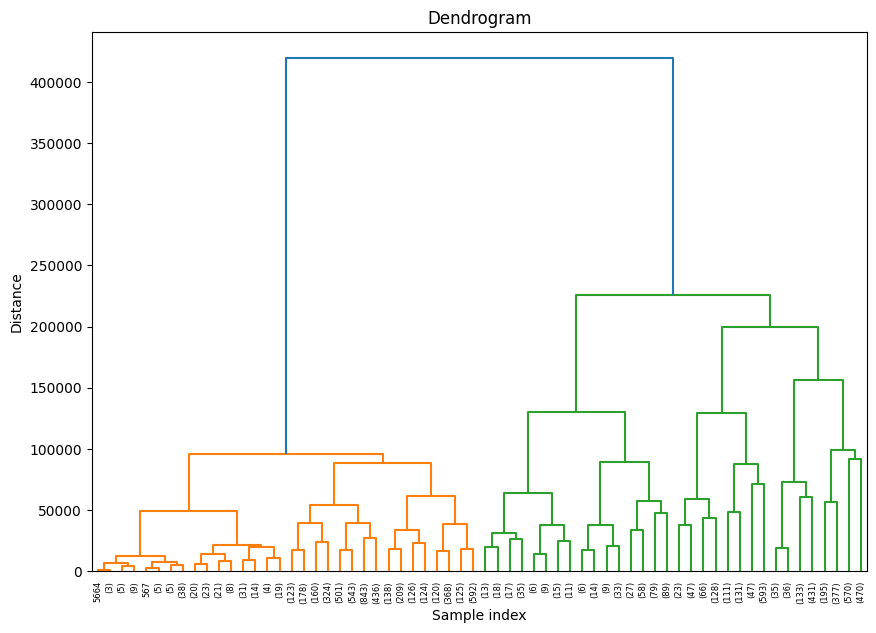

In [37]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Generate the linkage matrix using Ward linkage
Z = linkage(df_cluster, method='ward')

# Plot the Dengrogram
plt.figure(figsize=(10, 7))
dendrogram(Z, truncate_mode='level', p=5)
plt.title('Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()


In [38]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

# Hierarchical Clustering with 2 clusters
hierarchical_2 = AgglomerativeClustering(n_clusters=2, linkage='ward')
df['Hierarchical_Cluster_2'] = hierarchical_2.fit_predict(df_cluster)
silhouette_2 = silhouette_score(df_cluster, df['Hierarchical_Cluster_2'])
print("Silhouette Score with 2 clusters:", silhouette_2)

# Hierarchical Clustering with 3 clusters
hierarchical_3 = AgglomerativeClustering(n_clusters=3, linkage='ward')
df['Hierarchical_Cluster_3'] = hierarchical_3.fit_predict(df_cluster)
silhouette_3 = silhouette_score(df_cluster, df['Hierarchical_Cluster_3'])
print("Silhouette Score with 3 clusters:", silhouette_3)

Silhouette Score with 2 clusters: 0.3760472105128676
Silhouette Score with 3 clusters: 0.37699825432035095


In [39]:
from scipy.cluster.hierarchy import fcluster

# Based on the Dendrogram and the comparison of Silhouette scores between k=3 and k=4, we decided on k=3
optimal_clusters = 3 
df_cluster['Hierarchical_Cluster'] = fcluster(Z, optimal_clusters, criterion='maxclust')

# Display the number of samples in each cluster to verify the clustering results
print(df_cluster['Hierarchical_Cluster'].value_counts())


Hierarchical_Cluster
1    5117
3    3393
2     439
Name: count, dtype: int64


In [40]:
# Select numeric columns and exclude non-numeric columns
numeric_columns = df_cluster.select_dtypes(include=['float64', 'int64']).columns

# Group by cluster and calculate the feature mean for each cluster
cluster_means = df_cluster.groupby('Hierarchical_Cluster')[numeric_columns].mean()

# Calculate the variance of each feature between the means of different clusters
feature_variance = cluster_means.var()

# Output the variance of each feature in descending order
print("Variance of cluster means for each feature:")
print(feature_variance.sort_values(ascending=False))

Variance of cluster means for each feature:
PAYMENTS                            2.052339e+07
CREDIT_LIMIT                        1.213273e+07
CASH_ADVANCE                        4.341567e+06
BALANCE                             1.887415e+06
PURCHASES                           1.764182e+06
MINIMUM_PAYMENTS                    1.718289e+05
INSTALLMENTS_PURCHASES              1.290151e+05
CASH_ADVANCE_TRX                    1.633492e+01
ONEOFF_PURCHASES_FREQUENCY          1.448089e-02
CASH_ADVANCE_FREQUENCY              1.313714e-02
PRC_FULL_PAYMENT                    2.300459e-03
PURCHASES_FREQUENCY                 2.225016e-03
BALANCE_FREQUENCY                   1.801701e-03
PURCHASES_INSTALLMENTS_FREQUENCY    7.894576e-04
dtype: float64


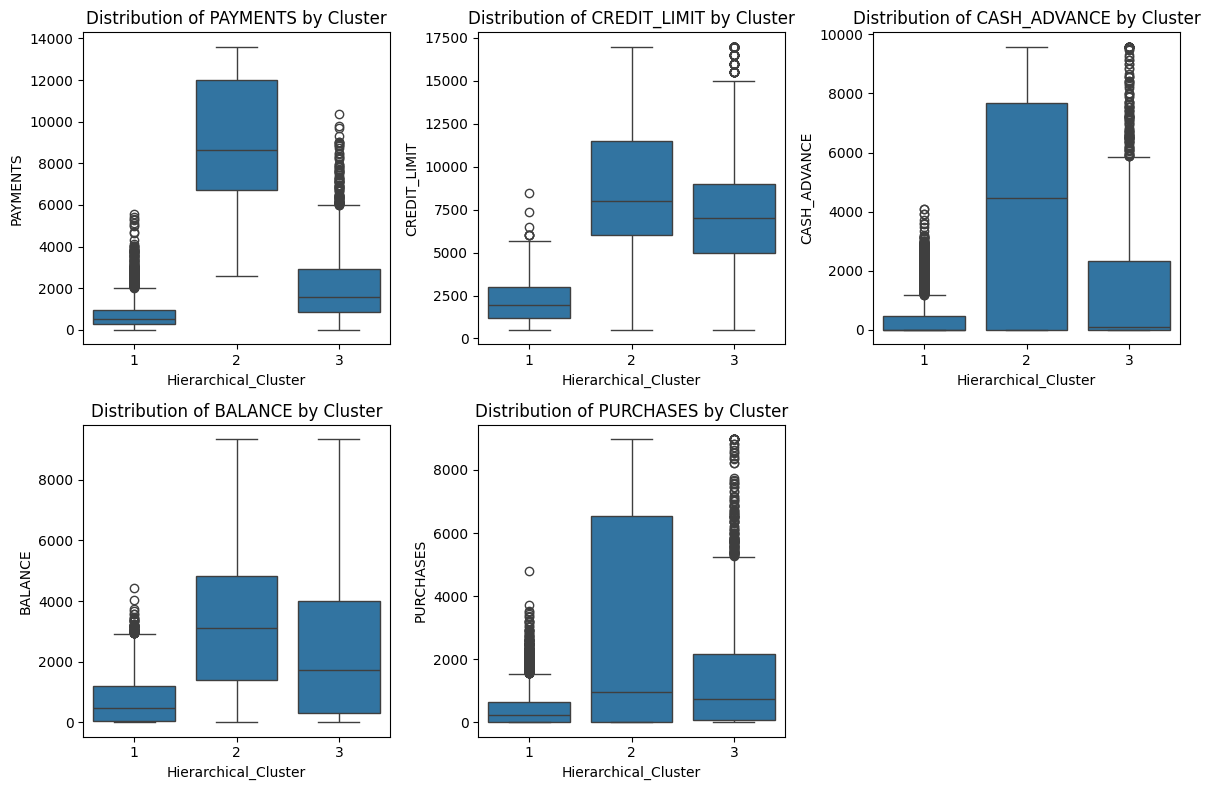

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the top 5 features with the largest variance
top_5_features = feature_variance.sort_values(ascending=False).head(5).index

# Create a new DataFrame containing only these top 5 features and cluster labels
top_5_df = df_cluster[top_5_features.tolist() + ['Hierarchical_Cluster']]

# Visualize the distribution of the top 5 features in each cluster
plt.figure(figsize=(12, 8))

for i, feature in enumerate(top_5_features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x='Hierarchical_Cluster', y=feature, data=top_5_df)
    plt.title(f'Distribution of {feature} by Cluster')
    plt.xlabel('Hierarchical_Cluster')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()


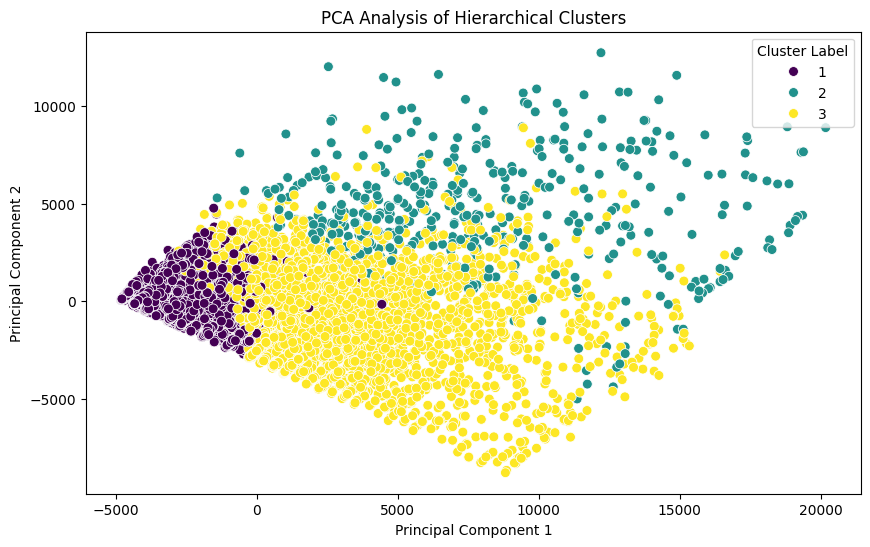

In [42]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Perform PCA to reduce data to two dimensions
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df_cluster)

# Add the hierarchical cluster labels to the PCA-transformed data
df_cluster['PCA1'] = pca_data[:, 0]
df_cluster['PCA2'] = pca_data[:, 1]

# Plot the clusters using the first two PCA components
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Hierarchical_Cluster', data=df_cluster, palette='viridis', s=50)
plt.title('PCA Analysis of Hierarchical Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster Label', loc='best')
plt.show()


In this PCA plot, hierarchical clustering has grouped the data into three clusters (purple, teal, and yellow):

Clear Purple Cluster: The purple cluster is compact and stands apart from the others, suggesting it represents a unique group of data points.

Overlap Between Teal and Yellow: The teal and yellow clusters overlap, meaning these two groups are not as distinct and may share similar characteristics.

Overall, the clustering shows some separation, especially for the purple cluster, but the teal and yellow clusters could benefit from further refinement to improve distinction.

## DBSCAN

In [43]:
from sklearn.cluster import DBSCAN

# Run DBSCAN, adjusting the eps and min_samples parameters to get suitable results
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(df_scaled)

# View clustering results
print(df['DBSCAN_Cluster'].value_counts())

DBSCAN_Cluster
-1     6588
 0     1808
 2      314
 4       32
 9       29
 6       26
 11      18
 1       14
 7       13
 3       10
 14       8
 10       7
 5        7
 12       7
 23       6
 15       6
 18       6
 16       5
 25       5
 8        5
 20       5
 24       5
 13       5
 17       5
 22       5
 21       4
 19       4
 26       2
Name: count, dtype: int64


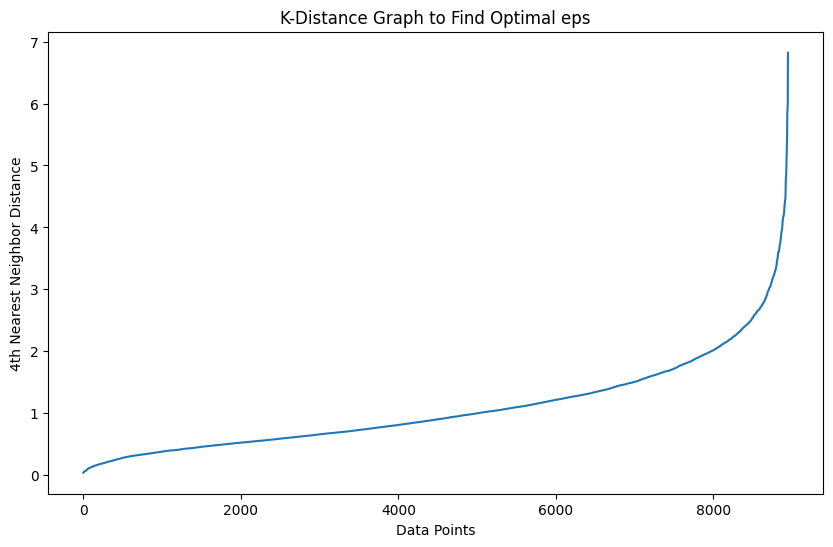

In [44]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

# Using the nearest neighbor method
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(df_scaled)
distances, indices = neighbors_fit.kneighbors(df_scaled)

# Sort by distance
distances = np.sort(distances[:, 4], axis=0)

# Draw the K distance graph
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title('K-Distance Graph to Find Optimal eps')
plt.xlabel('Data Points')
plt.ylabel('4th Nearest Neighbor Distance')
plt.show()

In [45]:
from sklearn.cluster import DBSCAN

# Adjust eps and min_samples parameters
dbscan = DBSCAN(eps=1.3, min_samples=8)  
df['DBSCAN_Cluster'] = dbscan.fit_predict(df_scaled)

# View the new clustering results
print(df['DBSCAN_Cluster'].value_counts())

DBSCAN_Cluster
 0    6601
-1    2278
 1      50
 2      12
 3       8
Name: count, dtype: int64


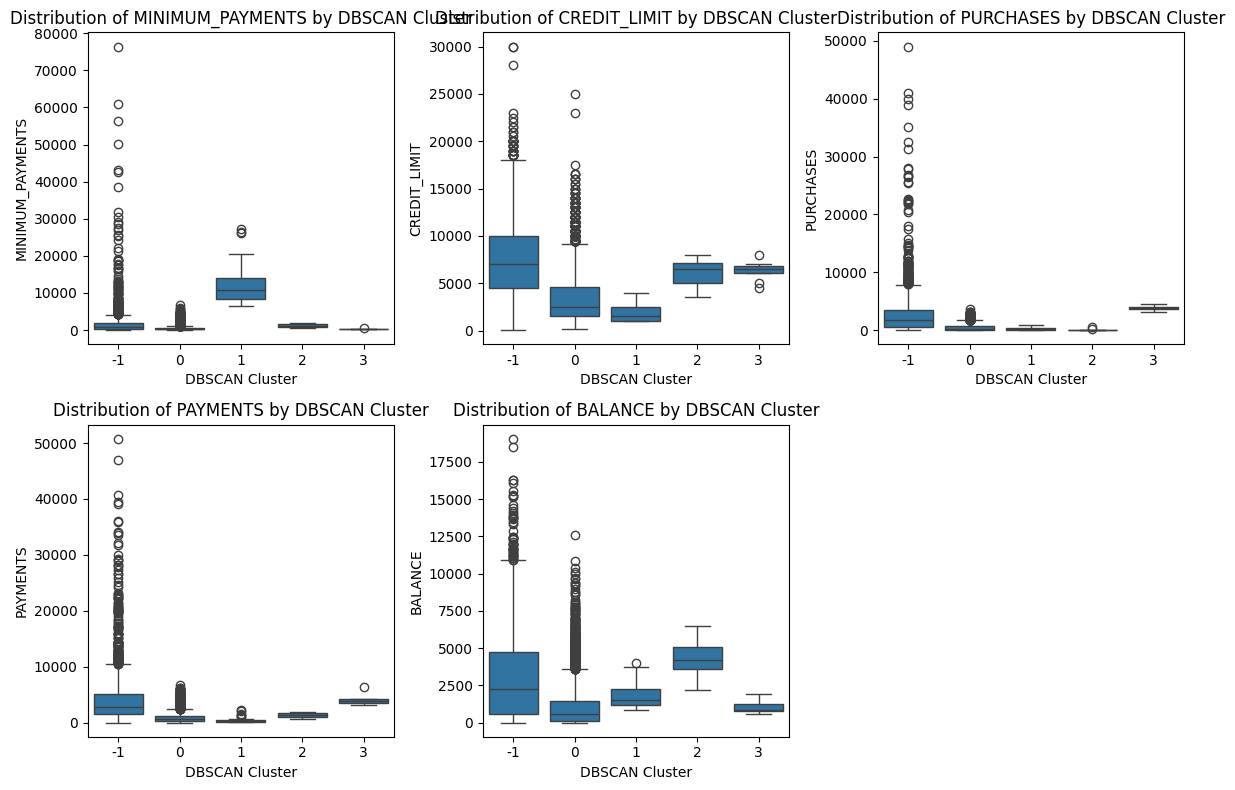

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns and exclude non-numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate the mean of each cluster (excluding noise points -1)
dbscan_means = df[df['DBSCAN_Cluster'] != -1].groupby('DBSCAN_Cluster')[numeric_columns].mean()

# Calculate the variance of the feature to measure the difference between clusters
dbscan_variance = dbscan_means.var()

# Select the top 5 features with the largest variance
top_5_features = dbscan_variance.sort_values(ascending=False).head(5).index

# Create a new DataFrame containing only these top 5 features and DBSCAN cluster labels
top_5_df = df[top_5_features.tolist() + ['DBSCAN_Cluster']]

# Visualize the distribution of the top 5 features in each cluster
plt.figure(figsize=(12, 8))

for i, feature in enumerate(top_5_features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x='DBSCAN_Cluster', y=feature, data=top_5_df)
    plt.title(f'Distribution of {feature} by DBSCAN Cluster')
    plt.xlabel('DBSCAN Cluster')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()


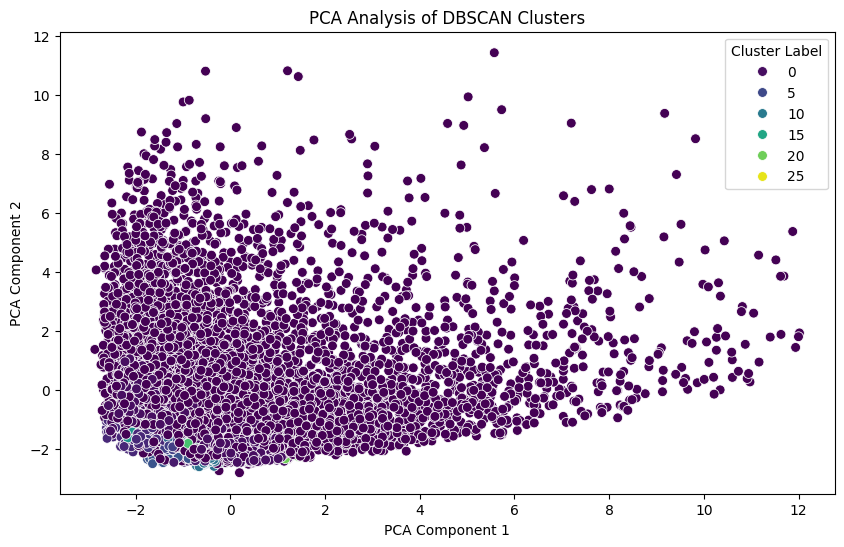

In [47]:
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Perform PCA to reduce dimensions to 2 for visualization purposes
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Convert PCA results into a DataFrame
df_pca = pd.DataFrame(df_pca, columns=['PCA1', 'PCA2'])

# Step 2: Apply DBSCAN with the chosen parameters (eps and min_samples)
dbscan = DBSCAN(eps=0.5, min_samples=5)
df_pca['DBSCAN_Cluster'] = dbscan.fit_predict(df_scaled)

# Step 3: Visualize the clusters formed by DBSCAN on the PCA-reduced data
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='DBSCAN_Cluster', data=df_pca, palette='viridis', s=50)
plt.title('PCA Analysis of DBSCAN Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster Label', loc='upper right')
plt.show()


In [48]:
from sklearn.metrics import silhouette_score

# Filter out noise points labeled as -1 for calculating the silhouette score
cluster_data = df_scaled[df['DBSCAN_Cluster'] != -1]
cluster_labels = df['DBSCAN_Cluster'][df['DBSCAN_Cluster'] != -1]

# Check if there are enough distinct clusters (at least two non-noise clusters)
unique_clusters = len(set(cluster_labels))

if unique_clusters > 1:
    # Calculate the silhouette score
    silhouette_avg = silhouette_score(cluster_data, cluster_labels)
    print("Silhouette Score:", silhouette_avg)
else:
    print("Silhouette Score cannot be calculated as there are not enough distinct clusters.")

Silhouette Score: 0.33916425161429753


## Gaussian Mixture Model (GMM)

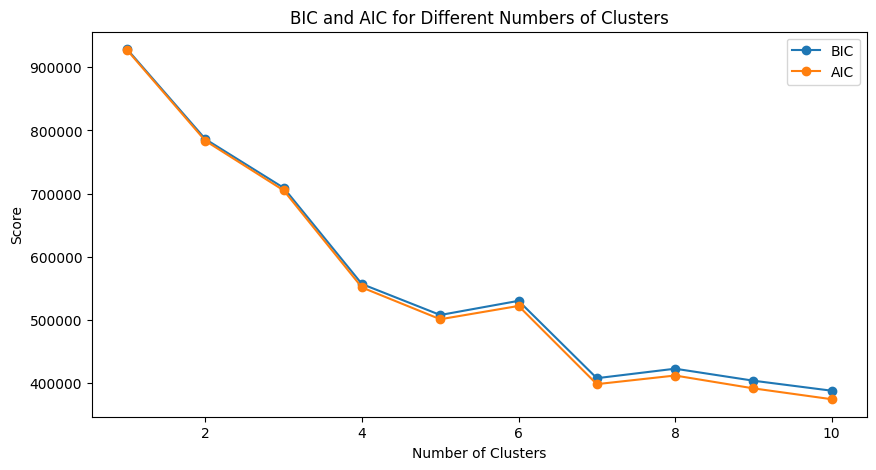

In [49]:
# Decide number of clusters
from sklearn.mixture import GaussianMixture

# Range of clusters to evaluate
cluster_range = range(1, 11)
bic_scores = []
aic_scores = []

# Fit GMM for each number of clusters and calculate BIC and AIC
for k in cluster_range:
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(df_cluster)
    bic_scores.append(gmm.bic(df_cluster))
    aic_scores.append(gmm.aic(df_cluster))

# Plot BIC and AIC scores
plt.figure(figsize=(10, 5))
plt.plot(cluster_range, bic_scores, label='BIC', marker='o')
plt.plot(cluster_range, aic_scores, label='AIC', marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('BIC and AIC for Different Numbers of Clusters')
plt.legend()
plt.show()

In [50]:
from sklearn.mixture import GaussianMixture

# Fit the Gaussian Mixture Model with 3 clusters
gmm = GaussianMixture(n_components=3, random_state=42)
df['GMM_Cluster'] = gmm.fit_predict(df_cluster)

# Check the distribution of data points across the clusters
print(df['GMM_Cluster'].value_counts())

GMM_Cluster
1    4999
0    2263
2    1687
Name: count, dtype: int64


In [51]:
# Select numeric columns and exclude non-numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate the mean of each cluster based on the numeric columns
gmm_means = df.groupby('GMM_Cluster')[numeric_columns].mean()

# Calculate the variance of the feature to measure the difference between clusters
gmm_variance = gmm_means.var()

# Check for features with large variance
print(gmm_variance.sort_values(ascending=False))


CREDIT_LIMIT                        9.771966e+06
PAYMENTS                            4.447924e+06
BALANCE                             2.372409e+06
CASH_ADVANCE                        1.996182e+06
PURCHASES                           8.766781e+05
MINIMUM_PAYMENTS                    6.817569e+05
ONEOFF_PURCHASES                    3.922368e+05
INSTALLMENTS_PURCHASES              9.637463e+04
PURCHASES_TRX                       7.695318e+01
CASH_ADVANCE_TRX                    1.596779e+01
GMM_Cluster                         1.000000e+00
Hierarchical_Cluster_2              3.131014e-01
Hierarchical_Cluster_3              2.194351e-01
DBSCAN_Cluster                      1.270567e-01
TENURE                              3.928622e-02
ONEOFF_PURCHASES_FREQUENCY          1.151300e-02
CASH_ADVANCE_FREQUENCY              1.025100e-02
PURCHASES_FREQUENCY                 2.969919e-03
BALANCE_FREQUENCY                   2.092014e-03
PRC_FULL_PAYMENT                    6.847759e-04
PURCHASES_INSTALLMEN

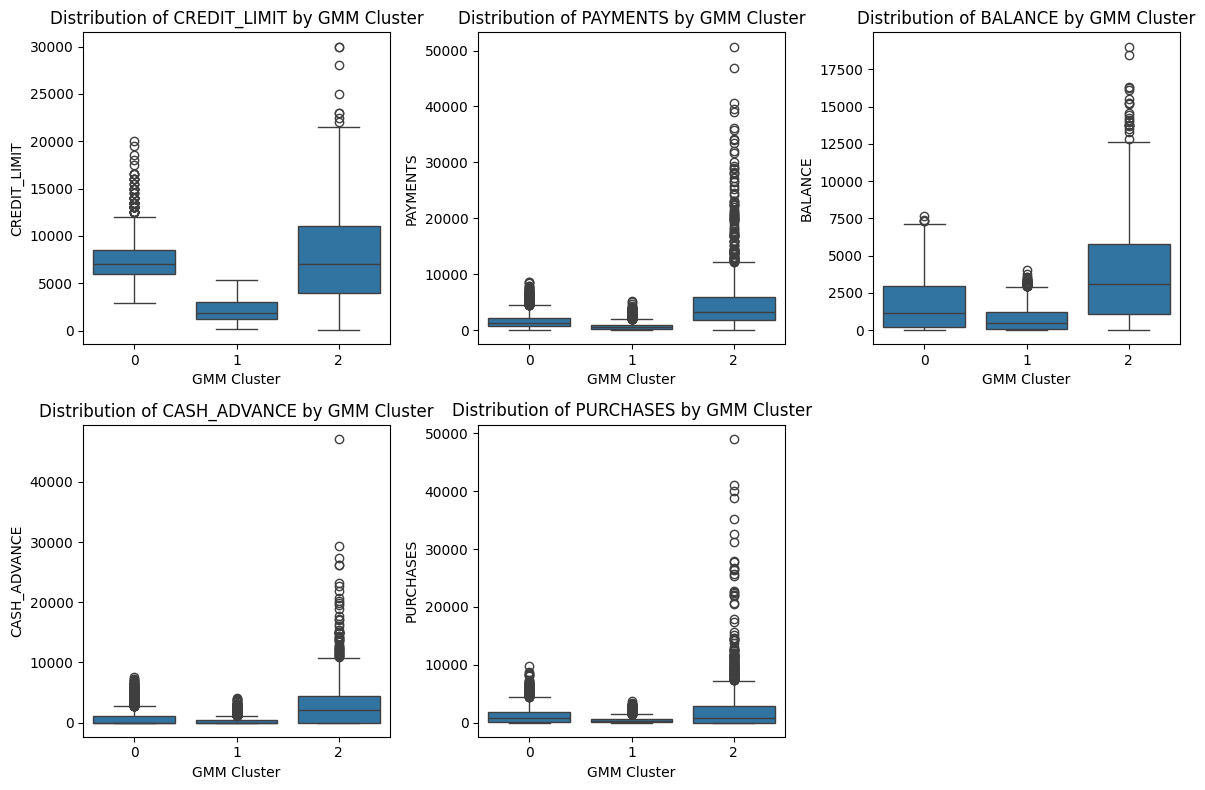

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the top 5 features with the largest variance
top_5_features = gmm_variance.sort_values(ascending=False).head(5).index

# Create a new DataFrame containing only these top 5 features and GMM cluster labels
top_5_df = df[top_5_features.tolist() + ['GMM_Cluster']]

# Visualize the distribution of the top 5 features in each cluster
plt.figure(figsize=(12, 8))

for i, feature in enumerate(top_5_features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x='GMM_Cluster', y=feature, data=top_5_df)
    plt.title(f'Distribution of {feature} by GMM Cluster')
    plt.xlabel('GMM Cluster')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()


In [53]:
from sklearn.metrics import silhouette_score
score = silhouette_score(df_cluster, df['GMM_Cluster'])
print("Silhouette Score:", score)


Silhouette Score: 0.3779315890966337


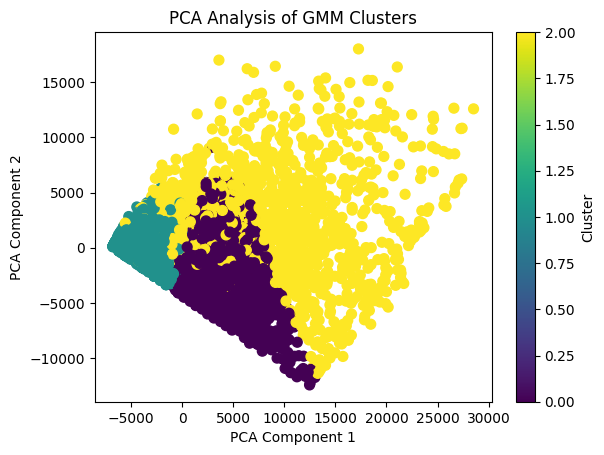

In [54]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
pca_data = pca.fit_transform(df_cluster)
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=df['GMM_Cluster'], cmap='viridis', s=50)
plt.title("PCA Analysis of GMM Clusters")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Cluster')
plt.show()



The PCA plot shows three clusters from the GMM model with some separation, but clusters overlap somewhat, especially with cluster 2 (yellow) being more spread out. This suggests that while the model has grouped the data, there may be some ambiguity between clusters.


---

# Part 5: K-Means Cluster Interpretation and Business Insights

## 1. Summary for Plots of Top Five Important Features by Cluster (K-Means)

| Cluster | Feature        | Median of PURCHASES | Customer Characteristics                           | Potential Strategy                                |
|---------|----------------|---------------------|---------------------------------------------------|--------------------------------------------------|
| 0       | CREDIT_LIMIT    | Low                 | Minimal credit usage and low spending              | - Increase Engagement<br>- Credit Education<br>- Credit Limit Review |
|    0    | PAYMENTS        | Low                 |                                     /              |              /                                    |
|    0    | BALANCE         | Low                 |                                          /         |                   /                               |
|    0    | CASH_ADVANCE    | Low                 |                                          /         |                  /                                |
|    0    | PURCHASES       | Low                 |                                            /       |                   /                               |
| 1       | CREDIT_LIMIT    | Moderate            | Average credit users with steady usage             | - Personalized Rewards<br>- Upsell Cross-Sell<br>- Retention Campaigns |
|    1     | PAYMENTS        | Moderate            |                                              /     |       /                                           |
|    1     | BALANCE         | Moderate            |                                              /     |      /                                           |
|    1     | CASH_ADVANCE    | Low                 |                                               /    |       /                                           |
|    1     | PURCHASES       | Moderate            |                                               /    |       /                                           |
| 2       | CREDIT_LIMIT    | High                | Likely affluent customers or those heavily reliant on credit | - Premium Rewards Program<br>- Credit Limit Increase Offers<br>- Exclusive Events |
|     2    | PAYMENTS        | High                |                                                 /  |    /                                              |
|    2     | BALANCE         | High                |                                                 /  |    /                                              |
|    2     | CASH_ADVANCE    | High                |                                                 /  |     /                                             |
|    2     | PURCHASES       | High                |                                                 /  |     /                                             |



## 2. Interpretation of Clusters

### 2.1 Cluster 0
**Customer Characteristics**  
This cluster likely represents low-activity or low-spending customers who may have lower credit limits and rarely use cash advances or make large payments. These could be customers who either do not rely heavily on credit or are cautious about its usage. Lower credit limits and payments distinguish this cluster from the others.

**Actionable Insights for Business**  
- **Increase Engagement**: Offer introductory cashback or low-interest promotions.
- **Credit Educational Marketing**: Provide resources on the benefits of responsible credit usage.
- **Credit Limit Review**: Consider reviewing credit limits for select customers to encourage higher spending.



### 2.2 Cluster 1
**Customer Characteristics**  
This cluster represents moderate or average credit users who occasionally make substantial payments and use their credit cards more actively than Cluster 0 customers. They may have middle-tier credit limits and display moderate spending behavior. Payments and purchases distinguish this cluster from the others.

**Actionable Insights for Business**  
- **Personalized Rewards**: Target them with rewards like discounts on essentials or travel points.
- **Upsell Cross-Sell**: Promote relevant banking products that align with their spending habits.
- **Retention Campaigns**: Offer monthly rewards or cashback based on usage to encourage customer loyalty.



### 2.3 Cluster 2
**Customer Characteristics**  
This cluster represents high-spending, high-credit customers with larger balances and more frequent cash advances. They likely rely heavily on credit and could be high-income individuals or those with a strong reliance on credit for purchases. High credit limits, balances, cash advances, and purchases are key traits of this group.

**Actionable Insights for Business**  
- **Premium Rewards Program**: Provide exclusive perks such as accelerated points, travel benefits, or concierge services.
- **Credit Limit Increase Offers**: Conduct periodic reviews to assess eligibility for higher credit limits.
- **Exclusive Events**: Invite these customers to premium events or offer special discounts on luxury goods, enhancing customer loyalty.





---
---
---
---
---
# **The Final Report**
---
# Part 1: Understanding the Credit Card Business

The credit card business is primarily operated by banks, credit unions, and networks. These institutions generate profits through interest, fees from customers, and interchange fees from merchants. Credit card issuers typically assess customer value based on a combination of features that predict a customer’s potential to generate revenue while minimizing risk.

Customers who display higher spending habits, make full payments, maintain steady repayment behavior, or hold healthy balances are usually considered valuable by card issuers due to their profitability and low risk. On the other hand, customers who make limited purchases, low payments, or frequently cash out in advance may be viewed as lower-value customers.

---

# Part 2: Data Preprocessing

- **Missing Values**: We found one missing value in the `CREDIT_LIMIT` column, which was deleted, as removing one data point will not significantly impact the dataset. Additionally, the `MINIMUM_PAYMENTS` column had 313 missing values. Since this is a considerable amount and the feature captures an important characteristic of customer payments, we couldn't simply delete these records. To address this, we replaced missing values based on the relationship between `MINIMUM_PAYMENTS` and `PAYMENTS`. Specifically:
  - If `PAYMENTS = 0`, we assumed `MINIMUM_PAYMENTS = 0`.
  - If `PAYMENTS` is between 0 and its mean, we replaced the missing `MINIMUM_PAYMENTS` with the respective `PAYMENTS` values.
  - If `PAYMENTS` exceeds its mean, we replaced the missing `MINIMUM_PAYMENTS` with the mean of `PAYMENTS`.

- **Incorrect Data**: Upon checking the range of frequency columns, we discovered one data point in `CASH_ADVANCE_FREQUENCY` that was out of the expected range of 0 to 1. We replaced this value with 1.0.

- **Duplicate Rows**: We checked for duplicate rows in the dataset and found none, indicating no duplicate entries.

---


# Part 3: EDA Summary

- **Data Distribution by Feature**: The boxplots and distributions show that most features are right-skewed, with the majority of data concentrated at the lower end of the range and fewer data points in the higher end. However, features like `BALANCE_FREQUENCY` and `TENURE` exhibit different patterns. 
  - `BALANCE_FREQUENCY` has most of its data between 0.9 and 1.0, indicating that most accounts are frequently updated, which reflects active account usage.
  - `TENURE` shows the majority of data around 12 years, suggesting that most customers have long-term relationships with their credit cards. In some cases, `TENURE` may reflect customer creditworthiness, as banks assign different tenures based on their assessment of customers' financial situations and ability to pay bills.

- **Outliers**: In our analysis of feature distributions and specific checks for outliers in key features, we identified numerous outliers and noisy data points. Features like `PURCHASES` and `CREDIT_LIMIT` have extreme high values, which can be valuable from a business perspective since they represent high-spending customers or those with higher credit limits. Rather than removing these outliers, we used the Quantile method, capping data at the 1st and 99th percentiles, thereby retaining valuable outliers while limiting extreme values.

- **Feature Correlation**: We used a heatmap to examine feature correlations, revealing a few pairs of features with high positive correlations (above 0.88). Since the negative correlations were not significant, we chose to ignore them. We focused on the top five pairs with high positive correlations.

- **Standardization**: We applied a Standard Scaler to standardize the data. Given the varying scales of features like balance, tenure, and frequencies (e.g., `PURCHASES` may be in the thousands while `PURCHASES_FREQUENCY` is on a 0–1 scale), standardization was necessary. Without it, features with larger numerical ranges could dominate the clustering process, especially in models like K-Means, which rely on Euclidean distances.

- **Feature Reduction**: Based on the correlation analysis, we found that some features, such as `ONEOFF_PURCHASES` and `PURCHASES`, as well as `PURCHASES` and `PURCHASES_TRX`, were highly correlated. Since these pairs can explain each other to some extent (e.g., `PURCHASES_TRX` represents the number of purchase transactions, a metric closely tied to `PURCHASES`), we decided to drop `PURCHASES_TRX` and `ONEOFF_PURCHASES` to prevent certain features from disproportionately influencing the clustering process.

---

# Part 4: Clustering Algorithms

## Model Interpretation:

We applied several clustering models to understand the structure within our dataset and evaluated each model based on its performance. The key metric used for comparison was the **Silhouette Score**, along with visual interpretations from PCA plots.

- **K-means Clustering**: The PCA plot for the K-means model displayed clear separation among the three clusters (blue, green, and red). The clusters had minimal overlap, with the blue cluster being particularly compact. This indicates that the K-means model captured distinct customer segments, reflecting different behaviors and characteristics among them. The **Silhouette Score** for K=3 was **0.3902**, the highest among all models, suggesting strong internal consistency within clusters and distinct separation between them.
  
- **Hierarchical Clustering**: While the hierarchical model created three clusters (purple, teal, and yellow), the overlap between the teal and yellow clusters was noticeable. This overlap suggested that the separation between these clusters was less clear. The **Silhouette Score** for 3 clusters was **0.3770**, slightly lower than that of K-means, indicating moderate separation but room for improvement in distinguishing the clusters.

- **DBSCAN**: The DBSCAN model was less successful in identifying distinct clusters. Most data points were grouped into a single cluster (6601 points), with a significant number labeled as noise (2278 points). The lack of distinct clusters made it difficult to calculate a meaningful Silhouette Score, and the PCA plot revealed that most data points were concentrated in one dense cluster with only a few scattered points. This suggests that the current parameters (eps=1.3, min_samples=8) may not be optimal and would need further tuning.

- **Gaussian Mixture Model (GMM)**: The GMM model also revealed three clusters but showed noticeable overlap, particularly in Cluster 2 (yellow). This overlap indicates some ambiguity in the cluster boundaries, likely due to the complex nature of the dataset. The **Silhouette Score** was **0.3769**, similar to that of the hierarchical model, reflecting moderate separation.

## Model Selection:

Based on the evaluation metrics and visual separation observed in the PCA plots, **K-means** is the best model for this dataset. It demonstrated the clearest separation between clusters, with distinct and compact groupings that had minimal overlap. This was supported by the highest Silhouette Score of **0.3902**, indicating that K-means effectively captures the different customer groups.

While hierarchical clustering showed some promise, the overlap between clusters suggested that it was less effective in creating distinct segments. DBSCAN struggled to form meaningful clusters under the current parameter settings, and the GMM model, though identifying distinct groups, still had overlapping clusters, which reduced its effectiveness in distinguishing customer groups.

Therefore, **K-means** is the most suitable model for segmenting the customers in this analysis.


---

# Part 5: K-Means Cluster Interpretation and Business Insights

## 1. Summary for Plots of Top Five Important Features by Cluster (K-Means)

| Cluster | Feature        | Median of PURCHASES | Customer Characteristics                           | Potential Strategy                                |
|---------|----------------|---------------------|---------------------------------------------------|--------------------------------------------------|
| 0       | CREDIT_LIMIT    | Low                 | Minimal credit usage and low spending              | - Increase Engagement<br>- Credit Education<br>- Credit Limit Review |
|    0    | PAYMENTS        | Low                 |                                     /              |              /                                    |
|    0    | BALANCE         | Low                 |                                          /         |                   /                               |
|    0    | CASH_ADVANCE    | Low                 |                                          /         |                  /                                |
|    0    | PURCHASES       | Low                 |                                            /       |                   /                               |
| 1       | CREDIT_LIMIT    | Moderate            | Average credit users with steady usage             | - Personalized Rewards<br>- Upsell Cross-Sell<br>- Retention Campaigns |
|    1     | PAYMENTS        | Moderate            |                                              /     |       /                                           |
|    1     | BALANCE         | Moderate            |                                              /     |      /                                           |
|    1     | CASH_ADVANCE    | Low                 |                                               /    |       /                                           |
|    1     | PURCHASES       | Moderate            |                                               /    |       /                                           |
| 2       | CREDIT_LIMIT    | High                | Likely affluent customers or those heavily reliant on credit | - Premium Rewards Program<br>- Credit Limit Increase Offers<br>- Exclusive Events |
|     2    | PAYMENTS        | High                |                                                 /  |    /                                              |
|    2     | BALANCE         | High                |                                                 /  |    /                                              |
|    2     | CASH_ADVANCE    | High                |                                                 /  |     /                                             |
|    2     | PURCHASES       | High                |                                                 /  |     /                                             |



## 2. Interpretation of Clusters

### 2.1 Cluster 0
**Customer Characteristics**  
This cluster likely represents low-activity or low-spending customers who may have lower credit limits and rarely use cash advances or make large payments. These could be customers who either do not rely heavily on credit or are cautious about its usage. Lower credit limits and payments distinguish this cluster from the others.

**Actionable Insights for Business**  
- **Increase Engagement**: Offer introductory cashback or low-interest promotions.
- **Credit Educational Marketing**: Provide resources on the benefits of responsible credit usage.
- **Credit Limit Review**: Consider reviewing credit limits for select customers to encourage higher spending.



### 2.2 Cluster 1
**Customer Characteristics**  
This cluster represents moderate or average credit users who occasionally make substantial payments and use their credit cards more actively than Cluster 0 customers. They may have middle-tier credit limits and display moderate spending behavior. Payments and purchases distinguish this cluster from the others.

**Actionable Insights for Business**  
- **Personalized Rewards**: Target them with rewards like discounts on essentials or travel points.
- **Upsell Cross-Sell**: Promote relevant banking products that align with their spending habits.
- **Retention Campaigns**: Offer monthly rewards or cashback based on usage to encourage customer loyalty.



### 2.3 Cluster 2
**Customer Characteristics**  
This cluster represents high-spending, high-credit customers with larger balances and more frequent cash advances. They likely rely heavily on credit and could be high-income individuals or those with a strong reliance on credit for purchases. High credit limits, balances, cash advances, and purchases are key traits of this group.

**Actionable Insights for Business**  
- **Premium Rewards Program**: Provide exclusive perks such as accelerated points, travel benefits, or concierge services.
- **Credit Limit Increase Offers**: Conduct periodic reviews to assess eligibility for higher credit limits.
- **Exclusive Events**: Invite these customers to premium events or offer special discounts on luxury goods, enhancing customer loyalty.

---